## Урок 7

### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

In [34]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [35]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

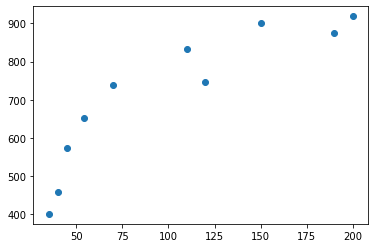

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

<B><font color='red'> Но ведь у нас данные не напоминают прямую линию. Это больше гипербола? То есть здесь мы должны были применить другую модель?

<b>Расчет c интерсептом

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

In [20]:
b = ((X * y).mean() - y.mean()*X.mean()) / ((X**2).mean() - X.mean()**2)
b

2.620538882402765

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [15]:
a = y.mean() - b * X.mean()
a

444.1773573243596

<b>y = 444.177 + 2.621x

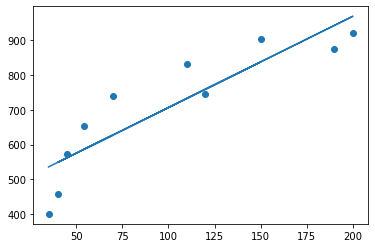

In [21]:
plt.scatter(X,y)
plt.plot(X, 444.177 + 2.621 * X)
plt.show()

<b>Расчет без интерсепта:

$B = (X^T * X)^{-1} * X^T * Y$

In [31]:
import seaborn as sns

In [36]:
X = X.reshape(10, 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [37]:
y = y.reshape(10, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [38]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[5.88982042]])

<b>y = 5.8898x

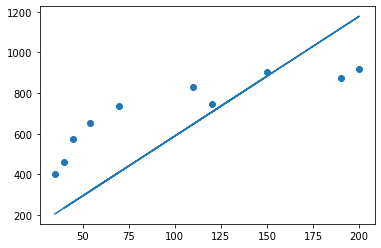

In [55]:
plt.scatter(X,y)
plt.plot(X, 5.8898 * X)
plt.show()

<b>Расчет с интерсептом

In [29]:
X = np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [30]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [41]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [42]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [43]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1 * X - y)**2)/n

In [44]:
alpha = 1e-6
alpha

1e-06

mse = (1/n) * np.sum((B1 * X - y)**2)

mse_p = (2/n) * np.sum((B1 * X-y)*X)

In [45]:
B1 = 0.1

In [46]:
n = 10

In [48]:
for i in range(10):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    print(f'B1={B1}')

B1=0.25952808
B1=0.414660650906144
B1=0.5655188230595969
B1=0.7122203698240712
B1=0.8548798195302346
B1=0.9936085448867542
B1=1.1285148499277806
B1=1.2597040545647504
B1=1.387278576808517
B1=1.5113380127259965


In [52]:
for i in range(100):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%10==0:
        print(f'Iteration {i}: B1={B1}, mse={mse_(B1)}')

Iteration 0: B1=5.636517342600247, mse=57400.798811816945
Iteration 10: B1=5.698262998962733, mse=57022.38035972514
Iteration 20: B1=5.7449574126921865, mse=56805.96437467272
Iteration 30: B1=5.780269504294831, mse=56682.19694650604
Iteration 40: B1=5.80697385099845, mse=56611.41485399434
Iteration 50: B1=5.827168693628889, mse=56570.93486103862
Iteration 60: B1=5.842440801701578, mse=56547.78451648746
Iteration 70: B1=5.853990150674089, mse=56534.54492789808
Iteration 80: B1=5.862724207626408, mse=56526.97326063283
Iteration 90: B1=5.869329233678346, mse=56522.64305469114


In [53]:
for i in range(101):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%10==0:
        print(f'Iteration {i}: B1={B1}, mse={mse_(B1)}')

Iteration 0: B1=5.874324205589446, mse=56520.16662739441
Iteration 10: B1=5.878101593323646, mse=56518.75036862087
Iteration 20: B1=5.88095819759459, mse=56517.940415945835
Iteration 30: B1=5.8831184703902295, mse=56517.4772072808
Iteration 40: B1=5.884752150840494, mse=56517.21230011528
Iteration 50: B1=5.885987602131164, mse=56517.060800776744
Iteration 60: B1=5.886921897385399, mse=56516.974158916666
Iteration 70: B1=5.887628446990941, mse=56516.92460878666
Iteration 80: B1=5.888162766675032, mse=56516.89627126734
Iteration 90: B1=5.888566839542056, mse=56516.88006515444
Iteration 100: B1=5.8888724148123055, mse=56516.87079694392


In [54]:
for i in range(3001):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%500==0:
        print(f'Iteration {i}: B1={B1}, mse={mse_(B1)}')

Iteration 0: B1=5.888898535392499, mse=56516.87012405876
Iteration 500: B1=5.889820419342732, mse=56516.8584157194
Iteration 1000: B1=5.889820420132673, mse=56516.85841571943
Iteration 1500: B1=5.889820420132673, mse=56516.85841571943
Iteration 2000: B1=5.889820420132673, mse=56516.85841571943
Iteration 2500: B1=5.889820420132673, mse=56516.85841571943
Iteration 3000: B1=5.889820420132673, mse=56516.85841571943


<b>y = 5.8898x

### Задача 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

<i> Если известна сигма ГС, то критерий Z, если не известна - то t.

### Задача 4

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [58]:
B1 = 0.1
B0 = 0.1

In [59]:
def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0 + B1 * X - y)**2)/n

In [70]:
for i in range(19000001):
    y_pred = B0 + B1 * X
    B0 -=alpha * (2/n) * np.sum((y_pred - y))
    B1 -=alpha * (2/n) * np.sum((y_pred - y) * X)
    if i%1000000==0:
        print(f'Iteration {i}: B0 = {B0}, B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration 0: B0 = 444.1374509347358, B1 = 2.620832611074025, mse = 6470.414605143085
Iteration 1000000: B0 = 444.1533289838989, B1 = 2.620715741612096, mse = 6470.414347632922
Iteration 2000000: B0 = 444.16288943711714, B1 = 2.6206453724494914, mse = 6470.414254273734
Iteration 3000000: B0 = 444.1686459544784, B1 = 2.6206030019366087, mse = 6470.4142204267755
Iteration 4000000: B0 = 444.1721120550347, B1 = 2.6205774899040657, mse = 6470.414208155706
Iteration 5000000: B0 = 444.17419905526236, B1 = 2.620562128659672, mse = 6470.414203706881
Iteration 6000000: B0 = 444.1754556748752, B1 = 2.6205528793837383, mse = 6470.4142020939835
Iteration 7000000: B0 = 444.1762123076895, B1 = 2.6205473102316987, mse = 6470.414201509231
Iteration 8000000: B0 = 444.17666788964283, B1 = 2.6205439569470954, mse = 6470.414201297232
Iteration 9000000: B0 = 444.1769422035642, B1 = 2.6205419378753567, mse = 6470.414201220372
Iteration 10000000: B0 = 444.1771073728108, B1 = 2.6205407221566728, mse = 6470.4142

<b>y = 44.1773 + 2.6205x